In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

df = pd.read_csv("loan.csv")

df.head(3)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

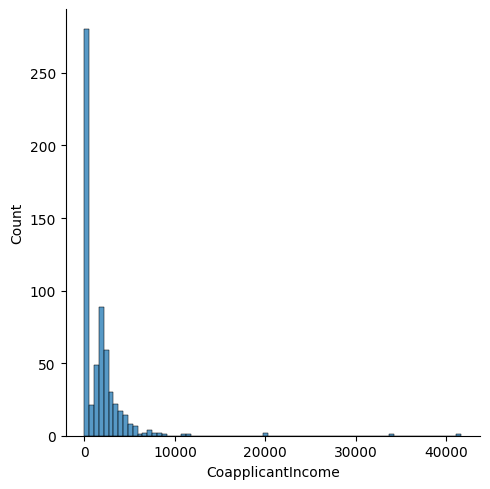

In [9]:
sns.displot(df["CoapplicantIncome"])
plt.show()

In [6]:
q1 = df["CoapplicantIncome"].quantile(0.25)
q3 = df["CoapplicantIncome"].quantile(0.75)
iqr = q3-q1

In [7]:
min_r = q1-(1.5*iqr)
max_r = q3+(1.5*iqr)
min_r, max_r

(-3445.875, 5743.125)

In [8]:
df[df["CoapplicantIncome"]<=max_r]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [21]:
ft = FunctionTransformer(func=np.log1p)

In [25]:
ft.fit(df[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [39]:
df["CoapplicantIncome_tf"] = ft.fit_transform(df[["CoapplicantIncome"]])

C:\Users\HP\AppData\Local\Temp\ipykernel_3268\3767770419.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])
C:\Users\HP\AppData\Local\Temp\ipykernel_3268\3767770419.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome_tf"])


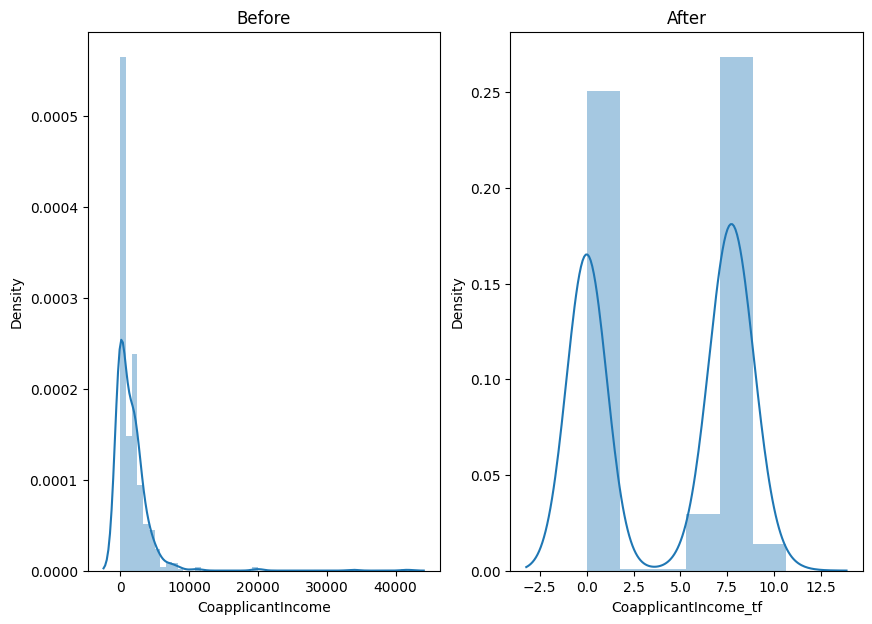

In [42]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.distplot(df["CoapplicantIncome"])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(df["CoapplicantIncome_tf"])
plt.title("After")
plt.show()

In [41]:
ft1 = FunctionTransformer(func=lambda x: x**2)
ft1.fit(df[["CoapplicantIncome"]])
df["CoapplicantIncome_tf1"] = ft1.transform(df[["CoapplicantIncome"]])